# Principal Component Analysis (PCA) in Python

## Understanding the Data
Before you go ahead and load the data, it's good to understand and look at the data that you will be working with!

### CIFAR - 10
The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.
The dataset consists of 50000 training images and 10000 test images.
The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
You can download the CIFAR dataset from here, or you can also load it on the fly with the help of a deep learning library like Keras.

In [1]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Traning data shape:', x_train.shape,y_train.shape)
print('Testing data shape:', x_test.shape,y_test.shape)

Traning data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


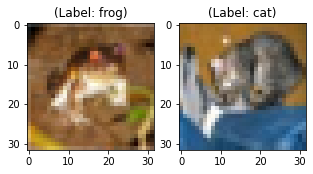

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

## Visualizing the CIFAR - 10 data
The following lines of code for visualizing the CIFAR-10 data is pretty similar to the PCA visualization of the Breast Cancer data.

Let's quickly check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.

In [13]:
np.min(x_train),np.max(x_train)

(0, 255)

In [14]:
x_train = x_train.astype('float16')
x_train = x_train / 255.0

In [22]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

In [25]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel_'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [26]:
df_cifar.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313726,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313726,1


In [27]:
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [28]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907677  0.11253204]


In [29]:
feat_cols = ['principal_component_'+str(i) for i in range(2)]

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = feat_cols )
principal_cifar_Df['y'] = y_train

principal_cifar_Df.tail()

,principal_component_0,principal_component_1,y
49995,7.105970,-5.850896,2
49996,6.216814,1.898896,6
49997,0.707279,-11.342392,9
49998,11.367840,-3.375847,1
49999,4.192726,-1.184058,1


<AxesSubplot:xlabel='principal_component_0', ylabel='principal_component_1'>

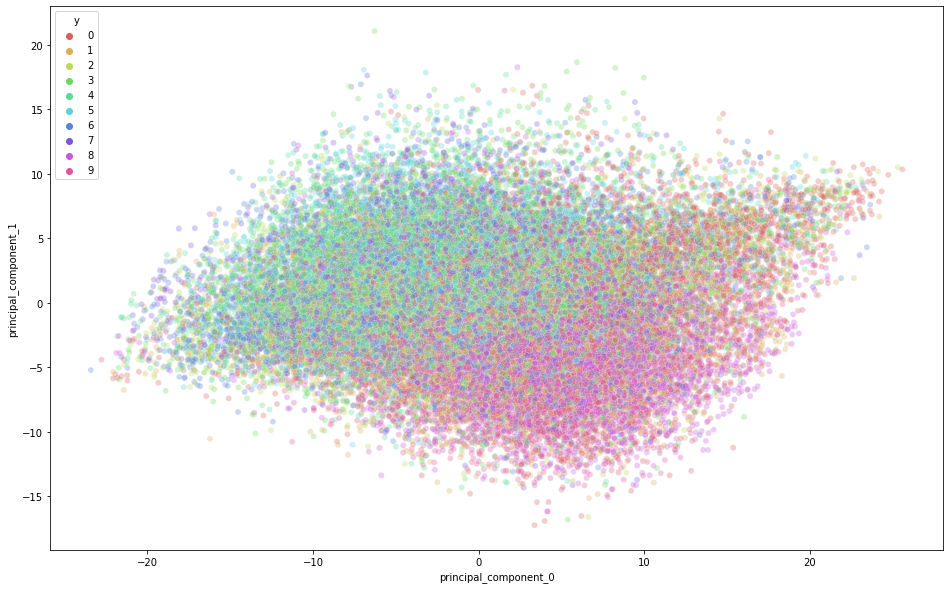

In [30]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal_component_0", y="principal_component_1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

## Speeding Machine Learning (ML) Algorithm: 
Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

Here, you can also pass how much variance you want PCA to capture. Let's pass 0.95 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the number of components required to capture 95% variance will be used.

In [37]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents_cifar = pca.fit(x_train_flat)

Now let's find out how many n_components PCA used to capture 0.95 variance.

In [34]:
pca.n_components_

217

From the above output, you can observe that to achieve 95% variance, the dimension was reduced to 10 principal components from the actual 30 dimensions.

**Now, we can used any classification ML algorithm for classified breast cancer or not.**